# Start of the House Prices Data Analysis, For Qafza Workshop Project

## Importing Required Libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Start of Data Exploration and Cleaning!

In [42]:
#Load Dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
#Explore the shape of the dataset
train.shape

(1460, 81)

In [43]:
#Explore Data Types and nulls
#train.info()
#Explore Statsitical Summary
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Counting Missing Values of each column!

In [44]:
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageFinish,81
GarageType,81


### Handling Missing Values

In [45]:
#Dropping Columns from both datasets since these columns has a lot of missing values more than 90% (PoolQC (1453 missing, ~99%), MiscFeature (1406 missing, ~96%), Alley (1369 missing, ~94%))
train.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)
test.drop(columns=['PoolQC', 'MiscFeature', 'Alley'], inplace=True)

In [46]:
#Replacing Non Numerics NULLs with NONE for features of the house which makes sense!
fill_none_columns = ['Fence', 'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for i in fill_none_columns:
    train[i] = train[i].fillna("None")
    test[i] = test[i].fillna("None")

In [47]:
# Fill LotFrontage on median per Neighborhood
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
test["LotFrontage"] = test.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [48]:
# Fill null numerics with 0
null_numerics = ['GarageYrBlt', 'MasVnrArea']
for i in null_numerics:
    train[i] = train[i].fillna(0)
    test[i] = test[i].fillna(0)

In [49]:
# Filling 1 Elictrical Missing value with The most common value using Mode!
train.fillna({'Electrical': train['Electrical'].mode()[0]}, inplace=True)
test.fillna({'Electrical': test['Electrical'].mode()[0]}, inplace=True)


In [50]:
#Checking Missing Values again!
missing_values = train.isnull().sum().sort_values(ascending=False)
missing_values = missing_values[missing_values > 0]
missing_values

,0


## Start OF EDA

#### Calculate Skewness of nemeric data, and Create Correlation Matrix

In [12]:
#Identify skewness for numerical Values
numerical_features = train.select_dtypes(include=np.number)
numerical_features.skew()
# Selecting only numeric values for the Matrix
# Create a correlation Matrix for numerical Values
corr_matrix = numerical_features.corr()
top_corr_features = corr_matrix['SalePrice'].sort_values(ascending=False)[:15]
print(top_corr_features)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.349876
Name: SalePrice, dtype: float64


### Subsettign the dataset for most Correlated features with Sale PRice

In [13]:
# Final Columns Included in selection of features for visualization
selected_features = [
    'SalePrice',
    'GrLivArea',
    'TotalBsmtSF',
    'GarageArea',
    'OverallQual',
    'FullBath',
    'TotRmsAbvGrd'
]

# Creating the sub-dataframe for analysis process
df_analysis = train[selected_features].copy()

# Check the shape and first few rows
print(df_analysis.shape)
df_analysis.head()

(1460, 7)


,SalePrice,GrLivArea,TotalBsmtSF,GarageArea,OverallQual,FullBath,TotRmsAbvGrd
0,160000,5642,6110,1418,10,2,12
1,184750,4676,3138,884,10,3,11
2,745000,4476,2396,813,10,3,10
3,755000,4316,2444,832,10,3,10
4,625000,3627,1930,807,10,3,10


### Plotting the data to spot outliers!

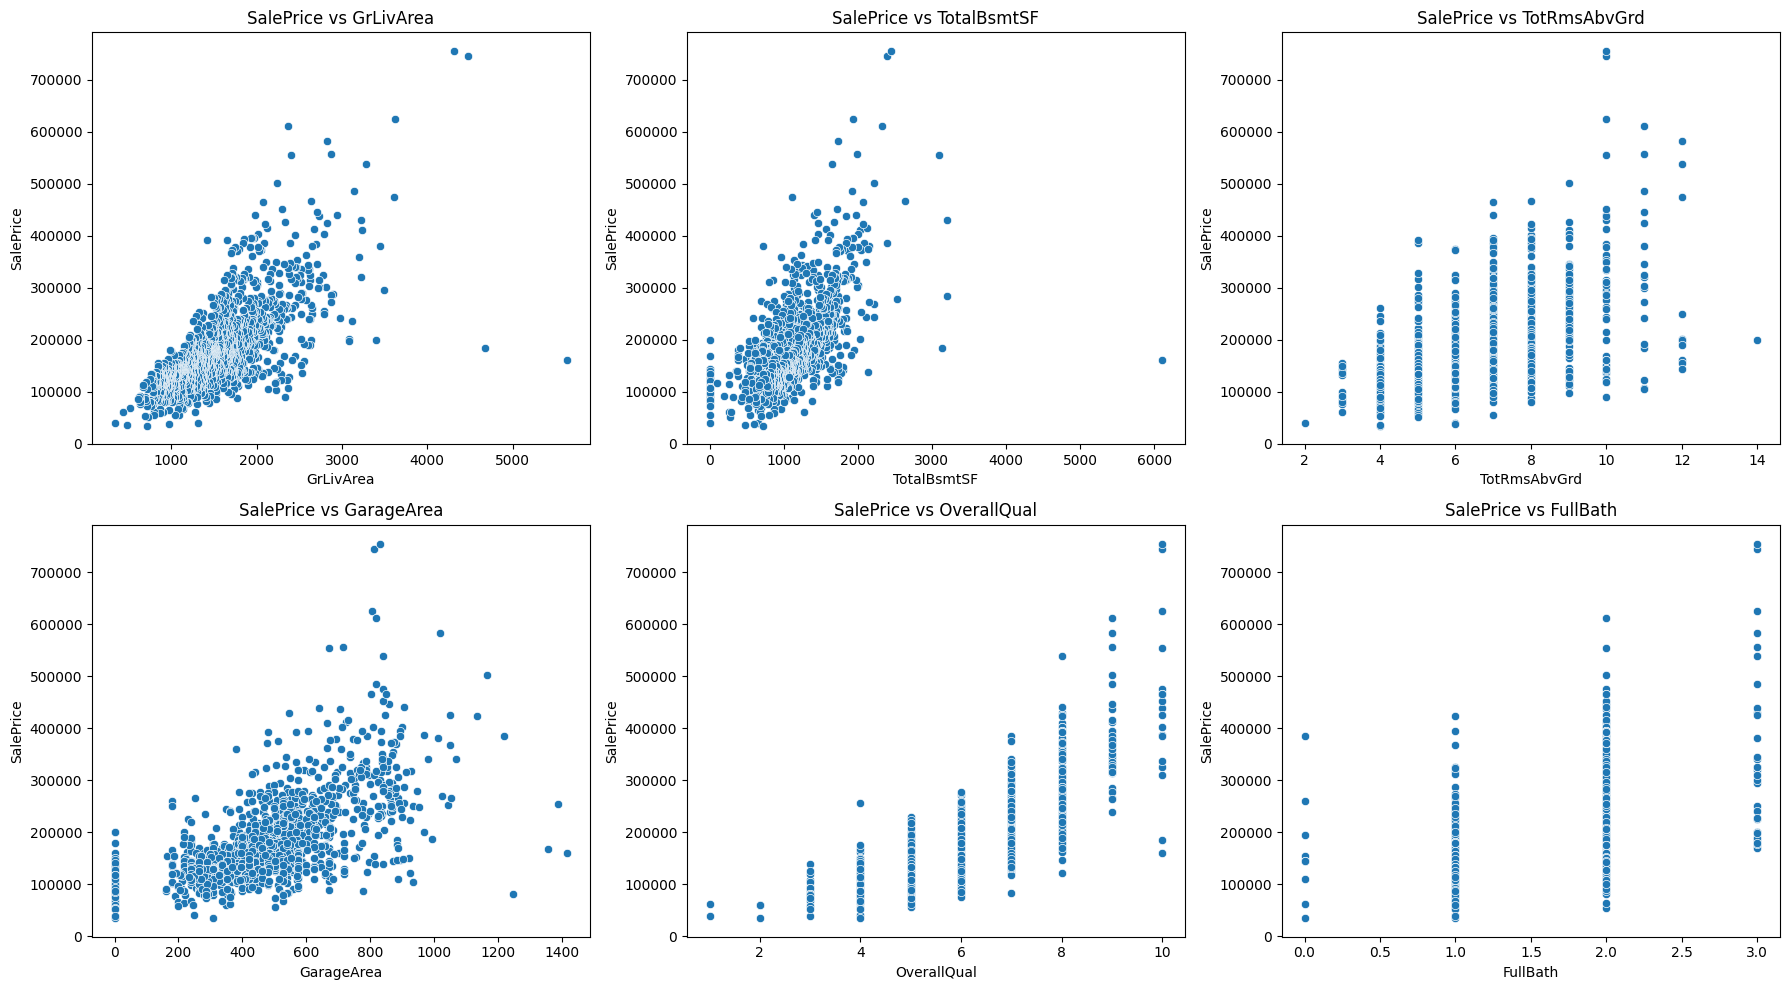

In [18]:
top_features = ["GrLivArea", "TotalBsmtSF", "TotRmsAbvGrd", "GarageArea", "OverallQual", "FullBath"]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(top_features):
    row, col = divmod(i, 3)
    sns.scatterplot(x=df_analysis[feature], y=df_analysis["SalePrice"], ax=axes[row, col])
    axes[row, col].set_title(f"SalePrice vs {feature}")

plt.tight_layout()
plt.show()

### Removing outliers using Interquartile Range (IQR) Method

In [19]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to large numerical columns
outlier_columns = ['SalePrice', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
for col in outlier_columns:
    df_analysis = remove_outliers(df_analysis, col)

### Compute key statistical measures (Min, Max, mean, median, standard deviation, skewness)

In [20]:
# Select only numeric columns for analysis
numeric_cols = df_analysis.select_dtypes(include=['number'])

# Compute summary statistics
summary_stats = pd.DataFrame({
    'Min': numeric_cols.min(),
    'Max': numeric_cols.max(),
    'Mean': numeric_cols.mean(),
    'Median': numeric_cols.median(),
    'Standard Deviation': numeric_cols.std(),
    'Skewness': numeric_cols.skew()
})

# Display the summary statistics
summary_stats

,Min,Max,Mean,Median,Standard Deviation,Skewness
SalePrice,34900,340000,169520.997727,159217.0,57244.979120,0.709241
GrLivArea,438,2640,1444.128788,1427.0,421.722347,0.435271
TotalBsmtSF,105,1907,1030.675758,974.5,325.180441,0.458321
GarageArea,0,954,452.440152,464.5,192.772917,-0.152735
OverallQual,1,10,5.993182,6.0,1.232286,0.066534
FullBath,0,3,1.519697,2.0,0.527836,-0.032142
TotRmsAbvGrd,3,12,6.334848,6.0,1.441820,0.454969


### Create the Corr Matrix

In [21]:
analysis_corr_matrix = numeric_cols.corr()
top_corr_features = analysis_corr_matrix['SalePrice'].sort_values(ascending=False)
print(top_corr_features)

SalePrice       1.000000
OverallQual     0.780186
GrLivArea       0.683798
GarageArea      0.619517
FullBath        0.583587
TotalBsmtSF     0.567059
TotRmsAbvGrd    0.462772
Name: SalePrice, dtype: float64


Visualizing COrrelations using Heatmap

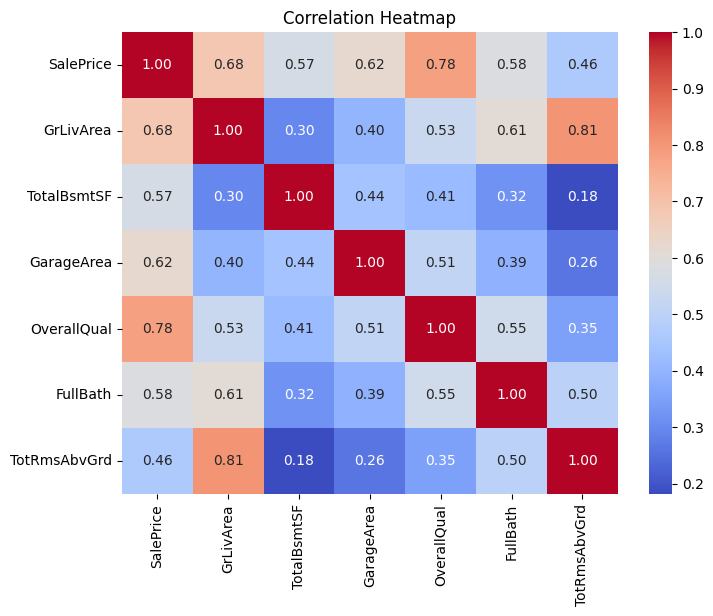

In [22]:
#Plotting a Heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df_analysis.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Visualization, After Identifying the significant relationships!

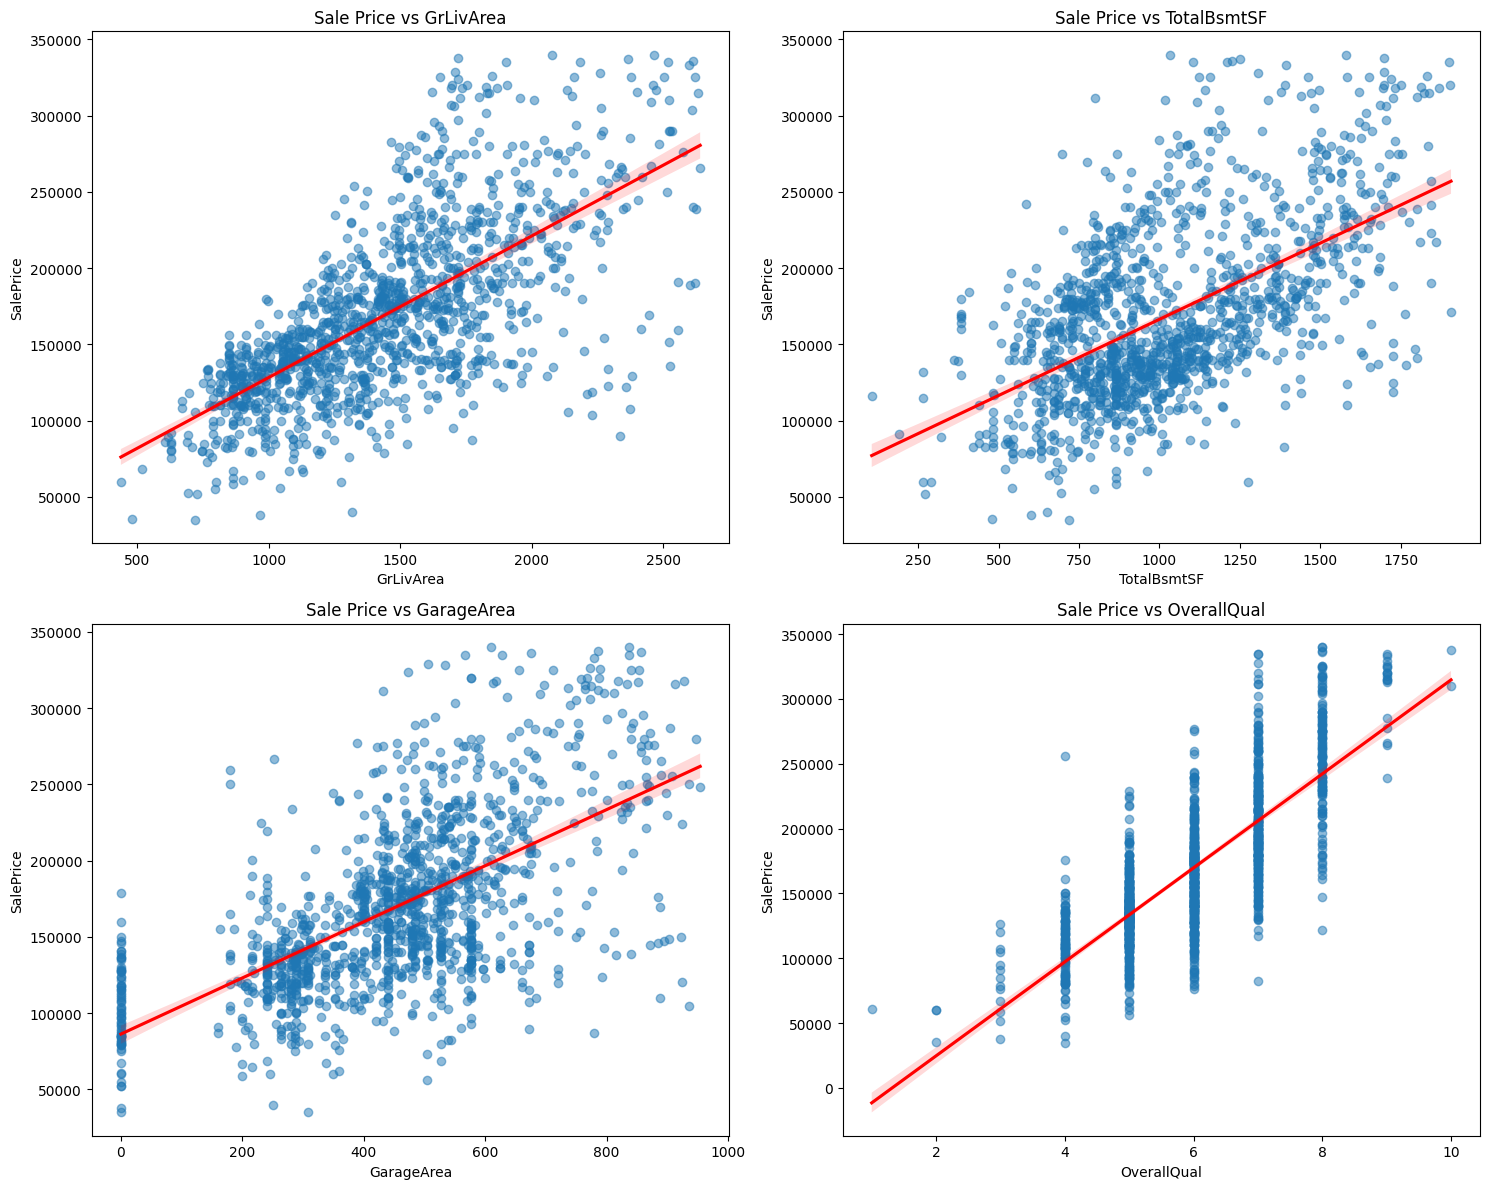

In [24]:
#Creating a regresion plot charts for Sale Price with Significant relationships
features = ["GrLivArea", "TotalBsmtSF", "GarageArea", "OverallQual"]

# Set up the figure size
plt.figure(figsize=(15, 12))

# Create regplots for each feature
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # Create a 3-row, 2-column subplot
    sns.regplot(x=df_analysis[feature], y=df_analysis["SalePrice"], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    plt.title(f"Sale Price vs {feature}")

plt.tight_layout()
plt.show()

Visulaizing Correlations using Box Plots

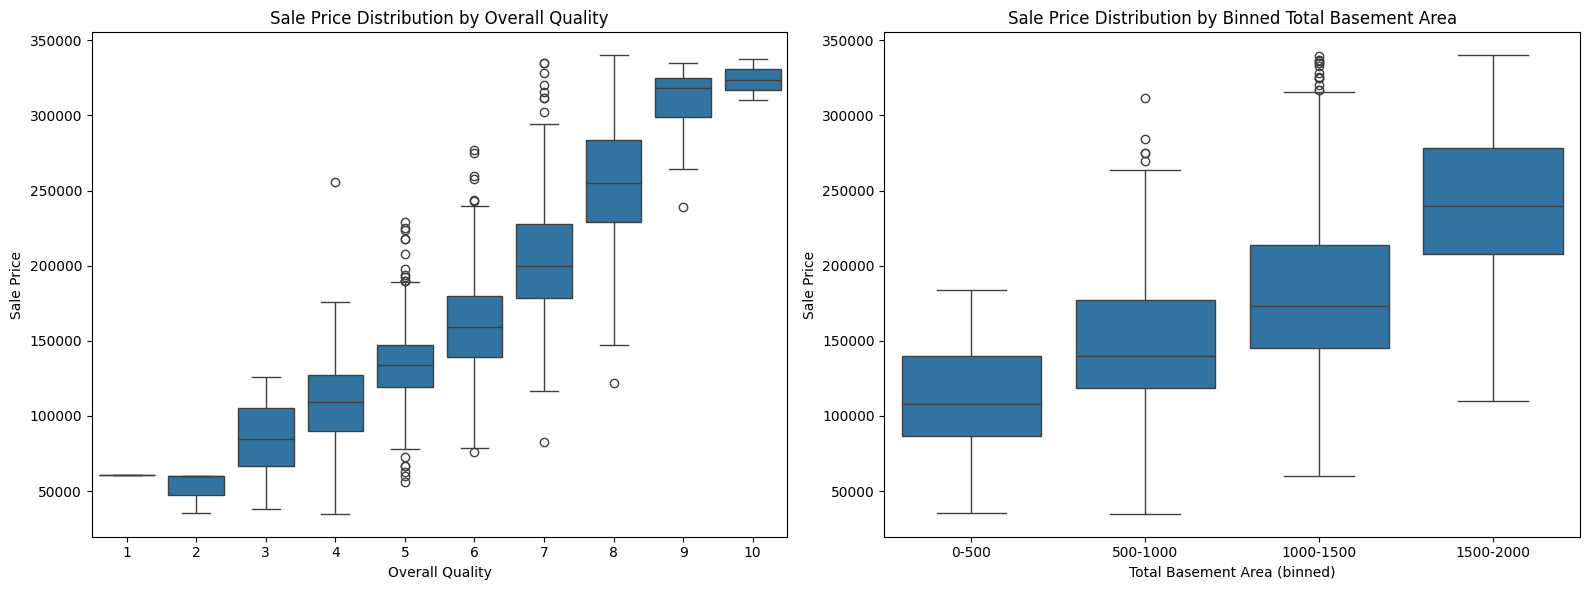

In [31]:
# Create Box Plot Visualizing Sale Price Distibution by Overall Quality and Sale Price Distribution by Binned Total Basement Area
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Box Plot for Sale Price by Overall Quality
sns.boxplot(x=df_analysis['OverallQual'], y=df_analysis['SalePrice'], ax=axes[0])
axes[0].set_xlabel("Overall Quality")
axes[0].set_ylabel("Sale Price")
axes[0].set_title("Sale Price Distribution by Overall Quality")

# Create Bins the Total Basement Area
df_analysis['BsmtSF_Binned'] = pd.cut(df_analysis['TotalBsmtSF'],
                                      bins=[0, 500, 1000, 1500, 2000],
                                      labels=["0-500", "500-1000", "1000-1500", "1500-2000"])

# Create the Box Plots
sns.boxplot(x=df_analysis['BsmtSF_Binned'], y=df_analysis['SalePrice'], ax=axes[1])
axes[1].set_xlabel("Total Basement Area (binned)")
axes[1].set_ylabel("Sale Price")
axes[1].set_title("Sale Price Distribution by Binned Total Basement Area")

plt.tight_layout()
plt.show()

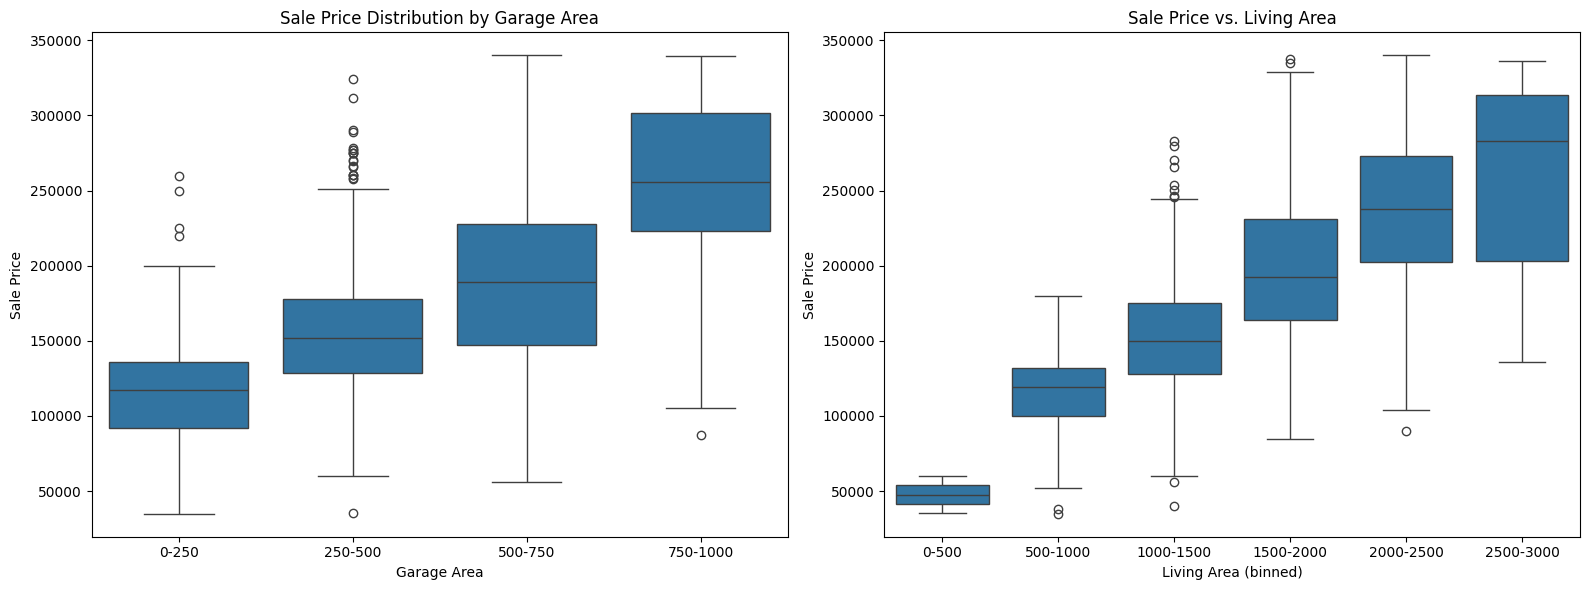

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
df_analysis['GarageArea_Binned'] = pd.cut(df_analysis['GarageArea'],
                                          bins=[0, 250, 500, 750, 1000],
                                          labels=["0-250", "250-500", "500-750", "750-1000"],
                                          include_lowest=True,
                                          right=True
                                          )
sns.boxplot(x=df_analysis['GarageArea_Binned'], y=df_analysis['SalePrice'], ax=axes[0])
axes[0].set_xlabel("Garage Area")
axes[0].set_ylabel("Sale Price")
axes[0].set_title("Sale Price Distribution by Garage Area")

df_analysis['GrLivArea_Binned'] = pd.cut(df_analysis['GrLivArea'], [0, 500, 1000, 1500, 2000, 2500, 3000],
                                         labels=["0-500", "500-1000", "1000-1500", "1500-2000", "2000-2500", "2500-3000"])

sns.boxplot(x=df_analysis['GrLivArea_Binned'], y=df_analysis['SalePrice'], ax=axes[1])
axes[1].set_title("Sale Price vs. Living Area")
axes[1].set_xlabel("Living Area (binned)")
axes[1].set_ylabel("Sale Price")

plt.tight_layout()
plt.show()


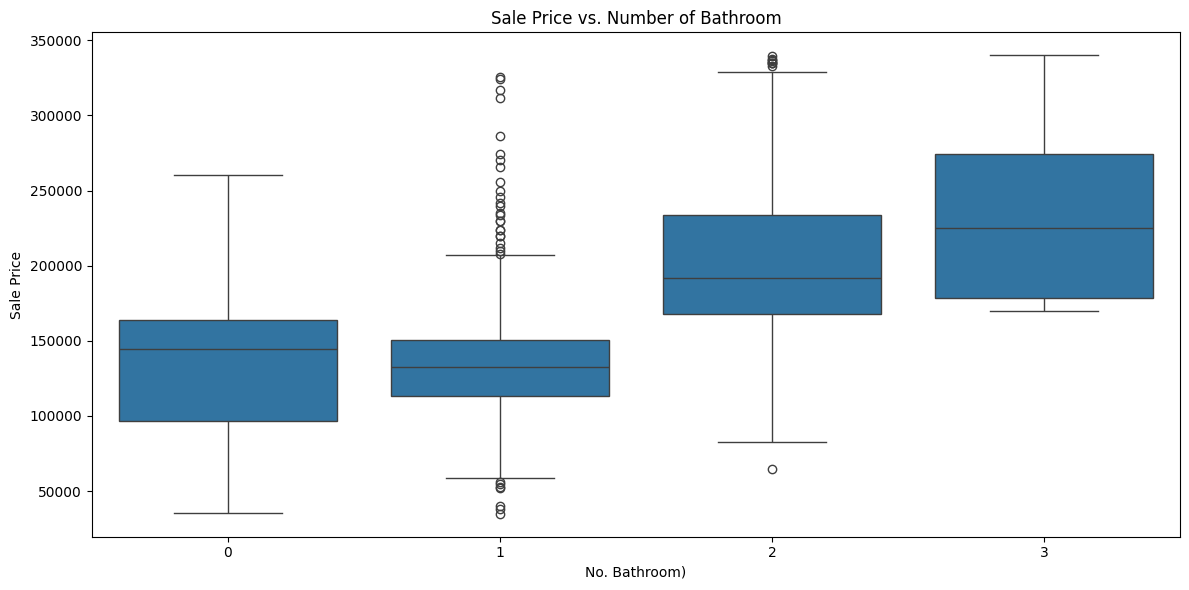

In [37]:

fig, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(x=df_analysis['FullBath'], y=df_analysis['SalePrice'], ax=ax)
ax.set_title("Sale Price vs. Number of Bathroom")
ax.set_xlabel("No. Bathroom)")
ax.set_ylabel("Sale Price")

plt.tight_layout()
plt.show()

Visualizing Distribution of data using Histograms

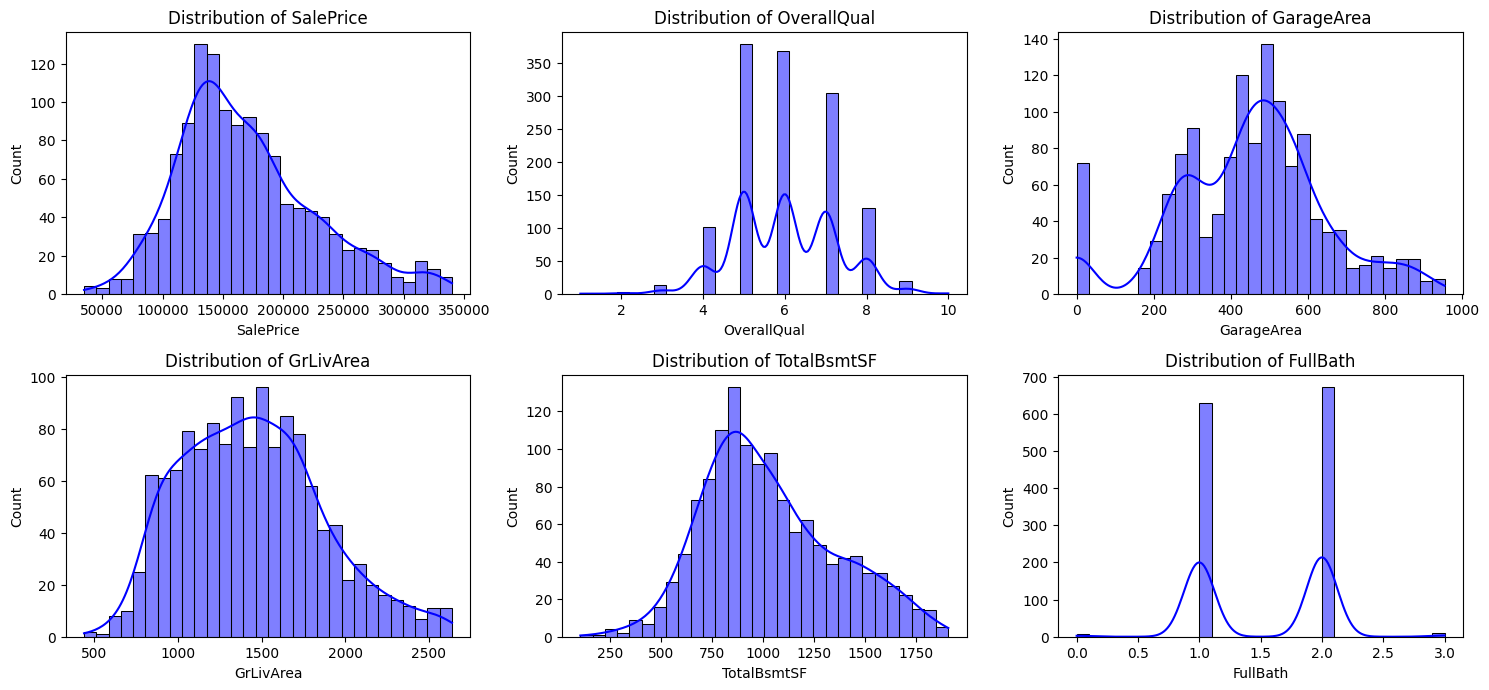

In [38]:
features = ['SalePrice', 'OverallQual', 'GarageArea', 'GrLivArea', 'TotalBsmtSF', 'FullBath']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)  # Arrange plots in a 2x3 grid
    sns.histplot(df_analysis[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

Key Findings:

House prices are most strongly influenced by Overall Quality, Living Area, and Basement Area.

Some attributes like Full Bathrooms and Garage Area also impact pricing but to a lesser extent.

The dataset had several outliers that were removed for better model performance.